# Visualização das análises de sensibilidade
- Notebook dedidado à leitura de arquivos .json resultantes das análises de sensibilidade para cada um dos algoritmos de otimização

In [8]:
# Importa pacotes
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

dict_pso_sens = read_json('simulations/pso_sensitivity.json')

In [10]:
dict_pso_sens[0].keys()

dict_keys(['global_factor', 'local_factor', 'v_max', 'fitness_calls', 'best_ind_list', 'avg_ind_list', 'best_solutions', 'total_time'])

In [10]:
best_ind_array = np.array(dict_pso_sens[0]['best_ind_list'])
avg_ind_array = np.array(dict_pso_sens[0]['avg_ind_list'])

indice = best_ind_array.argmax()
best_ind = best_ind_array[indice]
avg_ind = avg_ind_array[indice]
print(indice, best_ind, avg_ind)

90 0.6730546009024482 0.6723623733183995


In [31]:
class SensVisualizer():
    def __init__(self, file_path:str, parameters:list):
        self.parameters = parameters
        with open(file_path, 'r') as file:
            self.sens_list = json.load(file)
    
    def print_keys(self):
        print(self.sens_list[0].keys())

    def process_json(self):
        processed_list = []
        for sens_dict in self.sens_list:
            
            dict_filtered ={}
            for parameter in self.parameters:
                dict_filtered[parameter] = sens_dict[parameter]
            if sens_dict['best_ind_list'] != 'ERRO':
                best_ind_array = np.array(sens_dict['best_ind_list'])
                avg_ind_array = np.array(sens_dict['avg_ind_list'])
                indice = best_ind_array.argmax()
                best_ind = best_ind_array[indice]
                avg_ind = avg_ind_array[indice]

                dict_filtered['best_ind'] = best_ind
                dict_filtered['avg_ind'] = avg_ind
                dict_filtered['fitness_calls'] = sens_dict['fitness_calls'][indice]
                dict_filtered['total_time'] = sens_dict['total_time']

            else:
                dict_filtered['best_ind'] = 0
                dict_filtered['avg_ind'] = 0
                dict_filtered['fitness_calls'] = 0
                dict_filtered['total_time'] = 0


            processed_list.append(dict_filtered)
        
        self.df_sens = pd.DataFrame(processed_list)

    def get_inds(self):
        self.df_best_ind = self.df_sens.loc[self.df_sens['best_ind'] == self.df_sens['best_ind'].max()]
        self.df_avg_ind = self.df_sens.loc[self.df_sens['avg_ind'] == self.df_sens['avg_ind'].max()]
    
    def display_all(self):
        self.process_json()
        self.get_inds()
        print("Tabela de sensibilidade:")
        display(self.df_sens)

        print("Melhor indivíduo")
        display(self.df_best_ind)

        print("Melhor indivíduo médio")
        display(self.df_avg_ind)

        dict_params = {}
        for parameter in self.parameters:
            dict_params[parameter] = self.df_sens[parameter].unique()
        print("Parâmetros")
        print(dict_params)
        
path = 'simulations/cmaes_sensitivity.json'
parameters = ['mi', 'sigma']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.process_json()


# PSO

In [12]:
path = 'simulations/pso_sensitivity.json'
parameters = ['global_factor', 'local_factor', 'v_max']
viz_pso = SensVisualizer(file_path=path, parameters=parameters)
viz_pso.display_all()
df_sens_pso = viz.df_sens


Tabela de sensibilidade:


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,1.00,0.673055,0.672362,91.0,256.555982
1,3.5,1.0,3.25,0.678169,0.650149,100.0,204.638625
2,3.5,1.0,5.50,0.568837,0.215855,1.0,244.960276
3,3.5,1.0,7.75,0.568837,0.215855,1.0,236.972351
4,3.5,1.0,10.00,0.568837,0.215855,1.0,229.544171
...,...,...,...,...,...,...,...
105,6.0,6.0,1.00,0.619365,0.572761,90.0,220.540191
106,6.0,6.0,3.25,0.627488,0.549173,66.0,227.693079
107,6.0,6.0,5.50,0.635282,0.578032,65.0,232.404361
108,6.0,6.0,7.75,0.624780,0.557472,53.0,240.658479


Melhor indivíduo


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
18,2.25,2.25,7.75,0.686625,0.652802,100.0,205.455201


Melhor indivíduo médio


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
6,4.75,1.0,3.25,0.68476,0.678617,100.0,204.388476


Parâmetros
{'global_factor': array([3.5 , 4.75, 6.  , 2.25, 1.  ]), 'local_factor': array([1.  , 2.25, 3.5 , 4.75, 6.  ]), 'v_max': array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])}


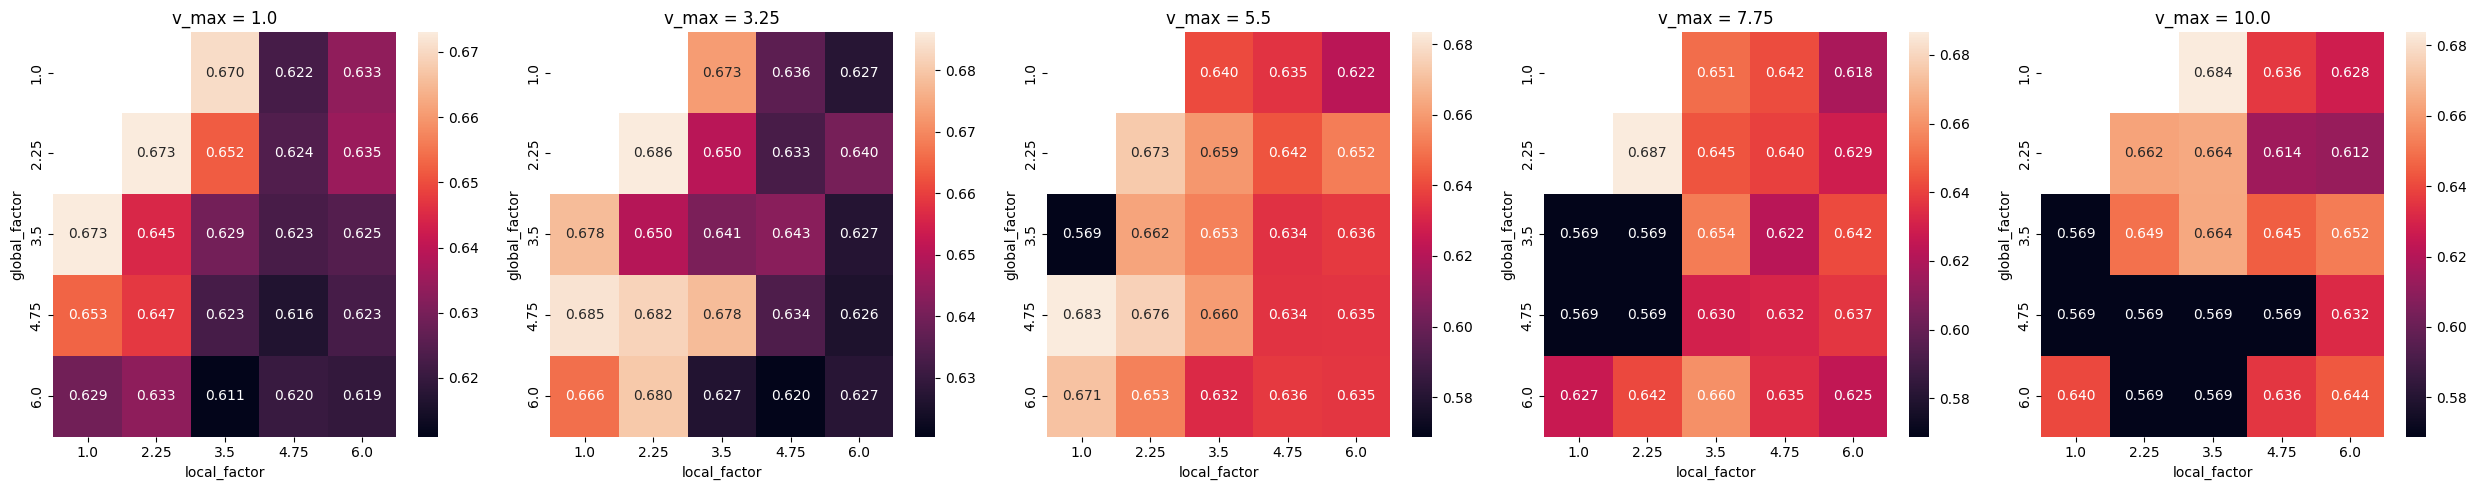

In [13]:
def plot_graph_pso(df, nom_x, nom_y, nom_z):
    list_graficos = []
    list_z = df[nom_z].unique()

    numero_plots = len(list_z)
    fig, axes = plt.subplots(1, numero_plots, figsize=(25, 5))  # Ajuste o tamanho conforme necessário
    iter_counter = 0
    for z in list_z:
        eixo_x = df.loc[df[nom_z] == z, nom_x]
        eixo_y = df.loc[df[nom_z] == z, nom_y]
        fitness = df.loc[df[nom_z] == z, 'best_ind']
        dict_grafico = {
            nom_x: eixo_x,
            nom_y: eixo_y,
            nom_z: z,
            'fitness': fitness
        }
        list_graficos.append(dict_grafico)

        df_filtrado = pd.DataFrame(dict_grafico)
        df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
        sns.heatmap(data=df_pivot, ax=axes[iter_counter], annot=True, fmt=".3f")
        axes[iter_counter].set_title(f'{nom_z} = {z}')

        iter_counter += 1
    # Ajuste o espaçamento entre os subplots
    plt.tight_layout()

    # Exiba o gráfico
    plt.show()


plot_graph_pso(df_sens_pso, 'global_factor', 'local_factor', 'v_max')

- Resultados parecem ser melhores na diagonal superior de global_factor 3.5 a 1.
- Valores do topo nao existem por conta da restrição global_factor + local_factor > 2

# Evolução Diferencial

In [14]:
path = 'simulations/de_sensitivity.json'
parameters = ['global_factor', 'local_factor']
viz = SensVisualizer(file_path=path, parameters=parameters)
# ERREI NO NOME 
# global_factor = mutation_rate 
# local_factor = crossover_rate
viz.display_all()
rename_dict = {'global_factor': 'mutation_rate', 'local_factor': 'crossover_rate'}
viz.df_sens.rename(columns=rename_dict, inplace=True)
df_sens_de = viz.df_sens


Tabela de sensibilidade:


,global_factor,local_factor,best_ind,avg_ind,fitness_calls,total_time
0,0.1,0.1,0.645334,0.405839,178.0,518.171259
1,0.2,0.1,0.658030,0.467639,194.0,503.693144
2,0.3,0.1,0.632765,0.491523,192.0,475.131447
3,0.4,0.1,0.627867,0.508644,200.0,476.882645
4,0.5,0.1,0.646189,0.510746,160.0,446.796429
...,...,...,...,...,...,...
95,0.6,1.0,0.657117,0.475255,198.0,443.960916
96,0.7,1.0,0.665012,0.479120,168.0,444.944356
97,0.8,1.0,0.662991,0.485721,194.0,442.938879
98,0.9,1.0,0.664783,0.480027,120.0,465.202074


Melhor indivíduo


,global_factor,local_factor,best_ind,avg_ind,fitness_calls,total_time
82,0.3,0.9,0.675916,0.4565,194.0,1103.714934


Melhor indivíduo médio


,global_factor,local_factor,best_ind,avg_ind,fitness_calls,total_time
27,0.8,0.3,0.623484,0.511558,188.0,441.547086


Parâmetros
{'global_factor': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'local_factor': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}


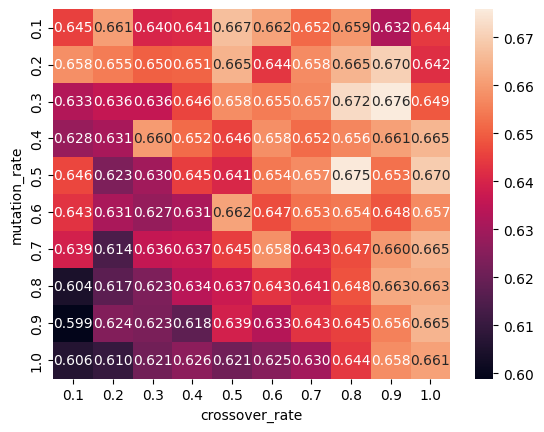

In [15]:
def plot_graph_de(df, nom_x, nom_y):

    eixo_x = np.trunc(df[nom_x] * 10) / 10.0
    eixo_y = np.trunc(df[nom_y] * 10)/ 10.0
    fitness = df['best_ind']
    dict_grafico = {
        nom_x: eixo_x,
        nom_y: eixo_y,
        'fitness': fitness
    }

    df_filtrado = pd.DataFrame(dict_grafico)
    df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
    sns.heatmap(data=df_pivot, annot=True, fmt=".3f")


plot_graph_de(df_sens_de, 'mutation_rate', 'crossover_rate')

- Crossover rate de melhor desempenenho é 0.9 conforme referênciia

# CMA-ES

In [16]:
path = 'simulations/cmaes_sensitivity.json'
parameters = ['mi', 'sigma']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.display_all()

Tabela de sensibilidade:


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0,0.0,0.0,1.0,248.359646
1,60,0,0.0,0.0,1.0,255.589477
2,100,0,0.0,0.0,1.0,257.728248
3,140,0,0.0,0.0,1.0,263.616873
4,180,0,0.0,0.0,1.0,266.857745
...,...,...,...,...,...,...
95,220,0,0.0,0.0,1.0,1256.339344
96,260,0,0.0,0.0,1.0,252.333042
97,300,0,0.0,0.0,1.0,256.815790
98,340,0,0.0,0.0,1.0,1226.014655


Melhor indivíduo


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0,0.0,0.0,1.0,248.359646
1,60,0,0.0,0.0,1.0,255.589477
2,100,0,0.0,0.0,1.0,257.728248
3,140,0,0.0,0.0,1.0,263.616873
4,180,0,0.0,0.0,1.0,266.857745
...,...,...,...,...,...,...
95,220,0,0.0,0.0,1.0,1256.339344
96,260,0,0.0,0.0,1.0,252.333042
97,300,0,0.0,0.0,1.0,256.815790
98,340,0,0.0,0.0,1.0,1226.014655


Melhor indivíduo médio


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0,0.0,0.0,1.0,248.359646
1,60,0,0.0,0.0,1.0,255.589477
2,100,0,0.0,0.0,1.0,257.728248
3,140,0,0.0,0.0,1.0,263.616873
4,180,0,0.0,0.0,1.0,266.857745
...,...,...,...,...,...,...
95,220,0,0.0,0.0,1.0,1256.339344
96,260,0,0.0,0.0,1.0,252.333042
97,300,0,0.0,0.0,1.0,256.815790
98,340,0,0.0,0.0,1.0,1226.014655


Parâmetros
{'mi': array([ 20,  60, 100, 140, 180, 220, 260, 300, 340, 380]), 'sigma': array([0])}


# DEPSO

In [17]:
path = 'simulations/depso_sensitivity.json'
parameters = ['global_factor', 'local_factor', 'v_max', 'mutation_rate', 'crossover_rate']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.display_all()

Tabela de sensibilidade:


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
0,3.05,1.05,1.0,0.20,0.2,0.684490,0.500000,191.0,127.125870
1,3.05,1.05,1.0,0.20,0.6,0.684451,0.581250,187.0,125.327503
2,3.05,1.05,1.0,0.20,1.0,0.644601,0.509065,191.0,144.698967
3,3.05,1.05,1.0,0.55,0.2,0.694663,0.495927,195.0,120.287649
4,3.05,1.05,1.0,0.55,0.6,0.678236,0.512581,191.0,124.756981
...,...,...,...,...,...,...,...,...,...
157,3.05,3.05,8.0,0.55,0.6,0.672401,0.478037,203.0,168.744677
158,3.05,3.05,8.0,0.55,1.0,0.653534,0.494287,203.0,157.292043
159,3.05,3.05,8.0,0.90,0.2,0.667922,0.519362,203.0,145.770835
160,3.05,3.05,8.0,0.90,0.6,0.652277,0.219786,199.0,171.480765


Melhor indivíduo


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
130,2.05,3.05,8.0,0.55,0.6,0.704091,0.382333,203.0,189.563619


Melhor indivíduo médio


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
56,3.05,2.05,1.0,0.2,1.0,0.690233,0.658045,203.0,178.86166


Parâmetros
{'global_factor': array([3.05, 2.05, 1.05]), 'local_factor': array([1.05, 2.05, 3.05]), 'v_max': array([1. , 4.5, 8. ]), 'mutation_rate': array([0.2 , 0.55, 0.9 ]), 'crossover_rate': array([0.2, 0.6, 1. ])}


# CMA-ES

In [39]:
path = 'simulations/cmaes_sensitivity.json'
parameters = ['mi', 'sigma']
viz_cames = SensVisualizer(file_path=path, parameters=parameters)
viz_cames.display_all()
df_sens_cmaes = viz.df_sens



Tabela de sensibilidade:


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0.05,0.5,0.246148,2.0,81.709230
1,60,0.05,0.5,0.143503,2.0,78.879909
2,100,0.05,0.5,0.098992,2.0,102.617663
3,140,0.05,0.5,0.216324,3.0,76.595976
4,180,0.05,0.5,0.153382,3.0,73.443713
...,...,...,...,...,...,...
95,220,0.60,0.0,0.000000,0.0,0.000000
96,260,0.60,0.0,0.000000,0.0,0.000000
97,300,0.60,0.0,0.000000,0.0,0.000000
98,340,0.60,0.0,0.000000,0.0,0.000000


Melhor indivíduo


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
62,100,0.35,0.681054,0.681005,100.0,56.18258


Melhor indivíduo médio


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
62,100,0.35,0.681054,0.681005,100.0,56.18258


Parâmetros
{'mi': array([ 20,  60, 100, 140, 180, 220, 260, 300, 340, 380]), 'sigma': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.5 , 0.55, 0.6 ])}


In [38]:
df_sens_cmaes.count()

,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,20,0.05,0.500000,0.246148,2.0,81.709230
1,60,0.05,0.500000,0.143503,2.0,78.879909
2,100,0.05,0.500000,0.098992,2.0,102.617663
3,140,0.05,0.500000,0.216324,3.0,76.595976
4,180,0.05,0.500000,0.153382,3.0,73.443713
5,220,0.05,0.500000,0.128119,3.0,71.600269
6,260,0.05,0.500000,0.249864,4.0,63.869190
7,300,0.05,0.500000,0.218280,4.0,63.629021
8,340,0.05,0.500000,0.156698,4.0,63.966094
9,380,0.05,0.500000,0.276214,5.0,66.541785


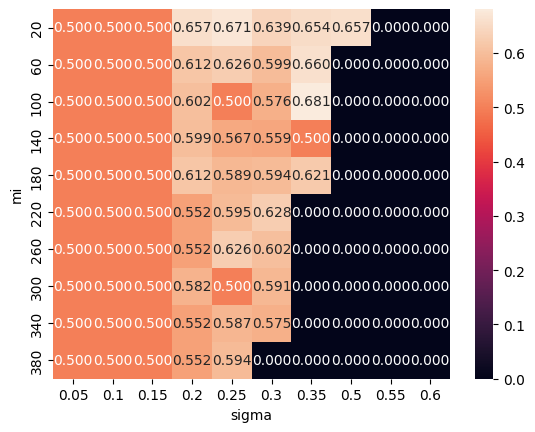

In [55]:
def plot_graph_cmaes(df, nom_x, nom_y):

    #eixo_x = np.trunc(df[nom_x] * 10) / 10.0
    #eixo_y = np.trunc(df[nom_y] * 10)/ 10.0
    fitness = df['best_ind']
    dict_grafico = {
        nom_x: df[nom_x].values,
        nom_y: df[nom_y].values,
        'fitness': fitness
    }

    df_filtrado = pd.DataFrame(dict_grafico)
    df_filtrado = df_filtrado.drop_duplicates()
    df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
    sns.heatmap(data=df_pivot, annot=True, fmt=".3f")


plot_graph_cmaes(df_sens_cmaes, 'mi', 'sigma')